In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('quiz_data_combined.csv')

In [3]:
data.head(2)

,quiz_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz_title,difficulty_level,topic
0,43,2025-01-17T15:51:29.859+05:30,32,2,80%,100,30,2,8,2,live,24,128,Topic Rank - #2402,6,8,Structural Organisation in Animals and Plants (7),NaN,Structural Organisation in Animals
1,51,2025-01-17T15:30:18.027+05:30,108,2,90%,100,105,3,27,3,exam,107,100,Topic Rank - #-171,9,12,Human Physiology (15),NaN,Body Fluids and Circulation


In [4]:
data['accuracy'] =data['accuracy'].str.rstrip('%').astype(float)

In [6]:
data[['date', 'time']] = data['submitted_at'].str.split('T', expand=True)
data['date']=data[['date']]

In [7]:
data.isnull().sum()

quiz_id                   0
submitted_at              0
score                     0
trophy_level              0
accuracy                  0
speed                     0
final_score               0
negative_score            0
correct_answers           0
incorrect_answers         0
source                    0
better_than               0
total_questions           0
rank_text                 0
mistakes_corrected        0
initial_mistake_count     0
quiz_title                0
difficulty_level         15
topic                     0
date                      0
time                      0
dtype: int64

In [11]:
data.head(15)

,quiz_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz_title,topic,date
0,43,32,2,80.0,100,30,2,8,2,live,24,128,Topic Rank - #2402,6,8,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals,2025-01-17
1,51,108,2,90.0,100,105,3,27,3,exam,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation,2025-01-17
2,6,92,1,100.0,100,92,0,23,0,exam,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body Fluids and Circulation,2025-01-17
3,51,116,2,96.0,100,115,1,29,1,live,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation,2025-01-16
4,6,36,2,90.0,100,35,1,9,1,live,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body Fluids and Circulation,2025-01-16
5,51,36,3,31.0,96,16,20,9,20,exam,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation,2025-01-15
6,57,40,3,38.0,86,24,16,10,16,exam,43,89,Topic Rank - #1810,0,16,Reproduction,Human Reproduction,2025-01-15
7,6,36,3,50.0,78,27,9,9,9,exam,152,23,Topic Rank - #-1598,0,9,Human Physiology PYQ,Body Fluids and Circulation,2025-01-15
8,20,12,2,30.0,100,5,7,3,7,live,18,59,Topic Rank - #2556,0,7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,2025-01-13
9,24,76,2,100.0,95,76,0,19,0,live,375,20,Topic Rank - #-8479,4,4,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,2025-01-13


In [9]:
data.drop(['difficulty_level','time','submitted_at'],axis=1,inplace=True)

In [12]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_26900\3122001325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='topic', y='accuracy', data=data, palette='coolwarm')


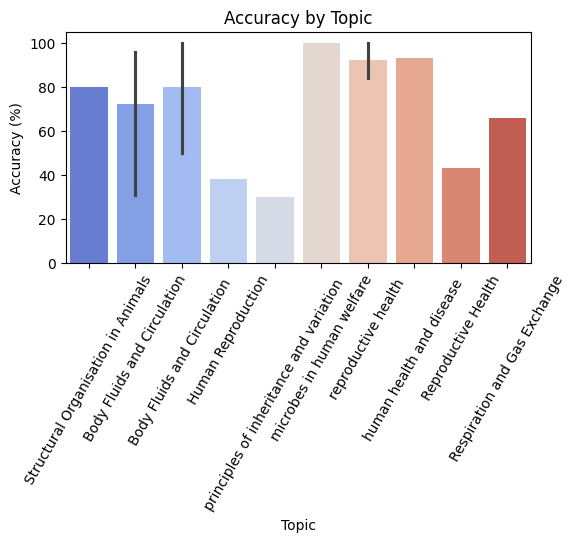

In [22]:
plt.figure(figsize=(6, 3))
sns.barplot(x='topic', y='accuracy', data=data, palette='coolwarm')
plt.xticks(rotation=60)
plt.title("Accuracy by Topic")
plt.xlabel("Topic")
plt.ylabel("Accuracy (%)")
plt.show()

by analysing this graph we can say that

Strengths:

High Accuracy Subjects:
The student excels in "Microbes in Human Welfare" and "Reproductive Health" with near-perfect accuracy.
"Human Health and Disease" also shows strong accuracy.

Weaknesses:

Low Accuracy Topics:
"Human Reproduction" and "Principles of Inheritance and Variation" have the lowest accuracy, suggesting the student struggles with these topics.
"Respiration and Gas Exchange" and "Reproductive Health" also show room for improvement.
Other Observations:

Inconsistent Performance in "Body Fluids and Circulation":
The student has varying accuracy in this topic, which may indicate inconsistency in understanding or test-taking strategy.

Recommendations for Improvement:
Focus on Human Reproduction and Principles of Inheritance and Variation, as these have the lowest accuracy.
Review Respiration and Gas Exchange to improve consistency.
Continue strengthening Microbes in Human Welfare and Reproductive Health, as these are strong areas.

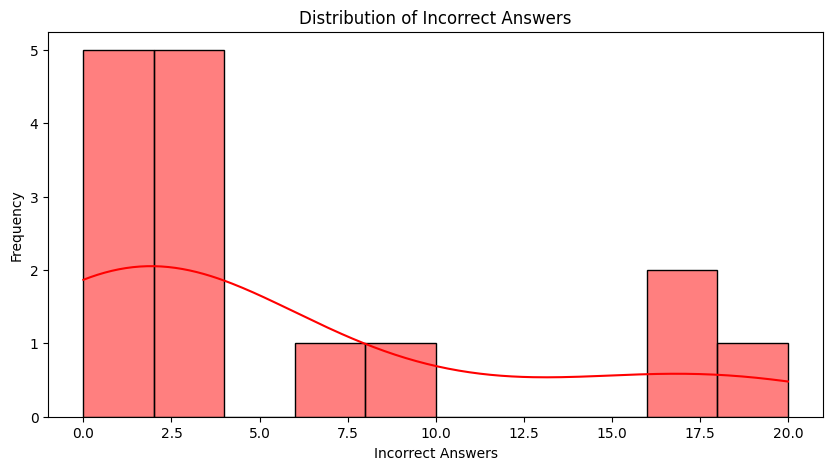

In [14]:
# Mistakes Analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['incorrect_answers'], bins=10, kde=True, color='red')
plt.title("Distribution of Incorrect Answers")
plt.xlabel("Incorrect Answers")
plt.ylabel("Frequency")
plt.show()

<Figure size 1200x600 with 0 Axes>

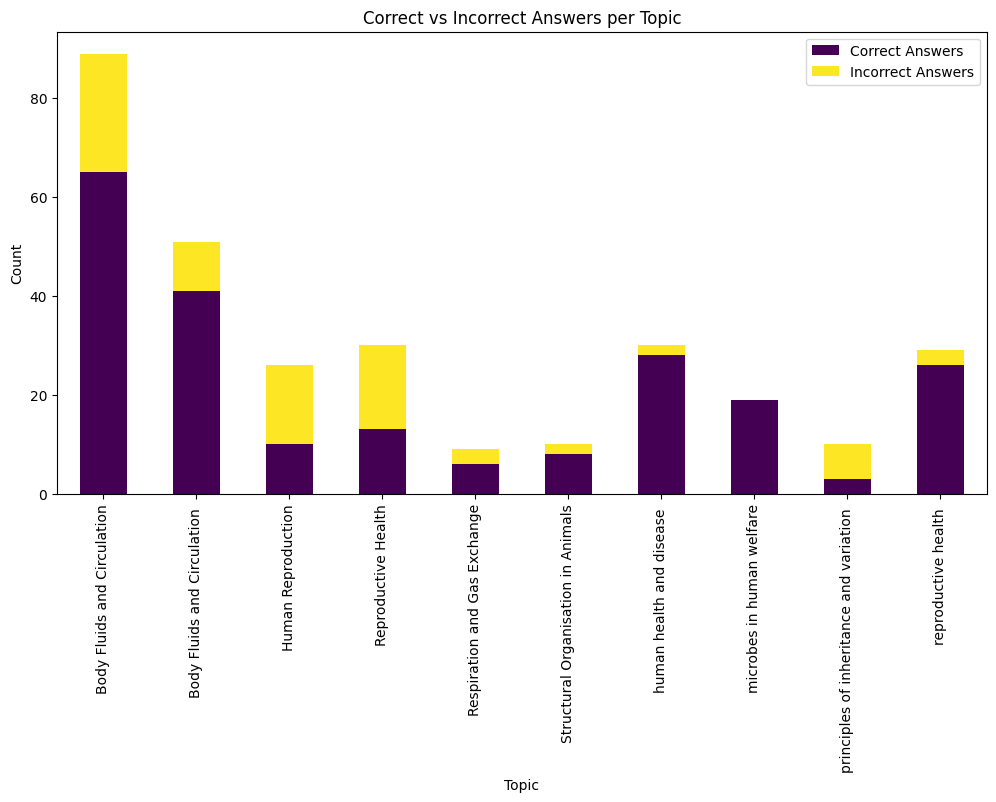

In [15]:
# Correct vs Incorrect Answers per Topic
plt.figure(figsize=(12, 6))
data_grouped = data.groupby("topic")[['correct_answers', 'incorrect_answers']].sum()
data_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Correct vs Incorrect Answers per Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend(["Correct Answers", "Incorrect Answers"])
plt.xticks(rotation=90)
plt.show()

Strengths:
✅ High Accuracy in "Microbes in Human Welfare" and "Structural Organisation in Animals":
The student performs well in these topics with a high number of correct answers and minimal incorrect answers.

✅ Strong Understanding of "Human Health and Disease":
The number of correct answers is significantly higher than incorrect ones, showing a solid grasp of the subject.

Weaknesses:
⚠️ Low Accuracy in "Human Reproduction" and "Reproductive Health":
The student struggles with these topics, showing a high proportion of incorrect answers.

⚠️ Challenges in "Principles of Inheritance and Variation":
A noticeable number of incorrect responses suggest a need for further revision.

Other Observations:
📉 Inconsistent Performance in "Body Fluids and Circulation":
While the student has many correct answers, there are also significant incorrect responses, indicating inconsistent understanding.

Recommendations for Improvement:
🎯 Focus on Weak Topics: Prioritize revising "Human Reproduction" and "Principles of Inheritance and Variation."
📊 Improve Consistency in "Body Fluids and Circulation": Regular practice and conceptual clarity can reduce incorrect answers.
🔄 Maintain Strengths: Continue excelling in "Microbes in Human Welfare" and "Human Health and Disease" with regular reinforcement.

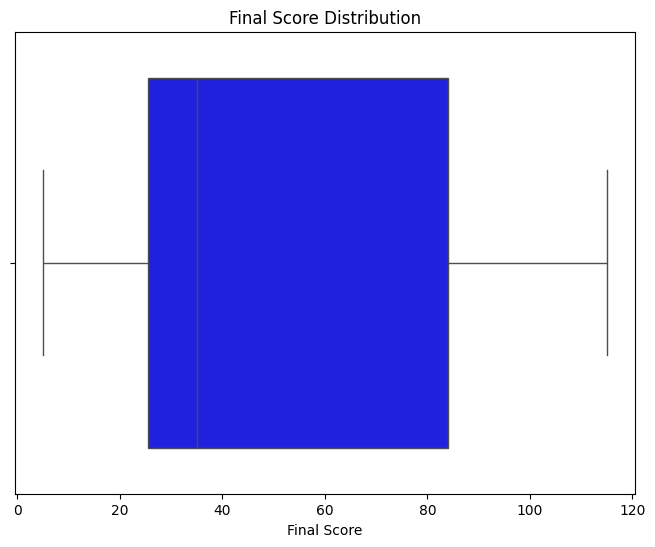

In [16]:
# Final Score Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['final_score'], color='blue')
plt.title("Final Score Distribution")
plt.xlabel("Final Score")
plt.show()

# Topic-wise Performance Analysis

## Strongest Performance
- **Microbes in Human Welfare**: 100% accuracy
- **Principles of Inheritance and Variation**: 90-100% accuracy
- **Reproductive Health**: 90-95% accuracy

## Weakest Performance
- **Human Reproduction**: 38% accuracy
- **Body Fluids and Circulation**: Varying from 30-90%
- **Respiration and Gas Exchange**: 65% accuracy

# Error Pattern Analysis

- **Most frequent error range**: 0-5 incorrect answers
- **Larger error clusters**: 15-20 incorrect answers in some tests
- **Body Fluids and Circulation**: Highest frequency of both correct and incorrect answers, indicating high engagement but inconsistent mastery.

# Overall Score Distribution

- **Median score**: Between 50-60
- **Score range**: 20 to 100
- **Score clustering**: Most scores fall in the 30-80 range

# Recommendations

## Immediate Focus Areas

### 1. **Human Reproduction**
- Review fundamental concepts
- Start with basic difficulty questions
- Aim for an accuracy improvement from 38% to at least 70%

### 2. **Respiration and Gas Exchange**
- Focus on specific subtopics where errors occur
- Increase practice frequency in this area

## Study Strategy

### **For Body Fluids and Circulation**
- Break the topic into smaller subtopics
- Create concept maps to connect related ideas
- Focus on understanding, not just memorization
- Review previous incorrect answers to identify patterns

## Practice Approach

- **Start with high-performing topics** to build confidence
- Gradually increase the difficulty level in weaker topics
- **Set specific targets**:
  - Aim for a minimum 70% accuracy in all topics
  - Limit incorrect answers to a maximum of 5 per test
  - Focus on consistency over speed

# Topic-Specific Action Items

## High-Performing Topics
- **Maintain performance** through periodic review
- Use as a foundation to understand related concepts

## Medium-Performing Topics
- **Identify weak areas** within these topics
- Practice with varied question types

## Low-Performing Topics
- **Dedicate 60% of study time** to these topics
- Start with basic concepts and build up
- Use multiple learning resources for better understanding

# Progress Monitoring

- Track accuracy improvements weekly
- Focus on reducing variance in **Body Fluids and Circulation**
- Set milestone goals for improving weak topics
- Maintain performance in strong topics while working on weak areas
